# SALARY RANGE PREDICTION 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
jobs_posting = pd.read_csv('Jobs_NYC_postings.csv')

In [7]:
jobs_posting.head()

Job ID                         Agency Posting Type  # Of Positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3  580593   DEPARTMENT OF TRANSPORTATION     External               1   
4  624937  DEPT OF HEALTH/MENTAL HYGIENE     External               1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    02   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
2  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
3             PROCUREMENT ANALYST        Competitive-1         12158    02   
4         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    03   

                                        Job Category  ...  \
0  Constituent Services & Community Programs Heal...  ...   
1  Policy, Research & Analysis Public Safety, Ins...  ...   
2              Engineering, Architecture, & Planning  ...   
3                 Finance, Accounting, & Procurement  ...   
4  Constituent Services & Community Programs Heal...  ...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   
1  Authorization to work in the United States is ...   
2                                                NaN   
3  The City of New York is an inclusive equal opp...   
4                                                NaN   

                                            To Apply        Hours/Shift  \
0  Apply online with a cover letter to https://a1...                NaN   
1  For City Employees, please go to Employee Self...           35 Hours   
2                                                NaN                NaN   
3  Resumes may be submitted electronically using ...  9:00am â 5:00pm   
4  Apply online with a cover letter to https://a1...                NaN   

                       Work Location 1 Recruitment Contact  \
0                                  NaN                 NaN   
1  30-30 Thomson Avenue, LIC, NY 11101                 NaN   
2                                  NaN                 NaN   
3                     To be determine.                 NaN   
4                                  NaN                 NaN   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   
1  New York City Residency is not required for th...   10/03/2023   
2  New York City Residency is not required for th...   02/01/2024   
3  New York City residency is generally required ...   04/04/2023   
4  New York City residency is generally required ...   02/06/2024   

    Post Until Posting Updated Process Date  
0  22-MAY-2024      01/23/2024   03/04/2024  
1          NaN      11/29/2023   03/04/2024  
2          NaN      02/01/2024   03/04/2024  
3          NaN      04/04/2023   03/04/2024  
4  05-JUN-2024      02/21/2024   03/04/2024  

[5 rows x 30 columns]

In [8]:
jobs_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [33]:
jobs_posting.describe(include= 'object')

Agency Posting Type Business Title Civil Service Title  \
count       0            0              0                   0   
unique      0            0              0                   0   
top       NaN          NaN            NaN                 NaN   
freq      NaN          NaN            NaN                 NaN   

       Title Classification Title Code No Level Job Category  \
count                     0             0     0            0   
unique                    0             0     0            0   
top                     NaN           NaN   NaN          NaN   
freq                    NaN           NaN   NaN          NaN   

       Full-Time/Part-Time indicator Career Level  ... Preferred Skills  \
count                              0            0  ...                0   
unique                             0            0  ...                0   
top                              NaN          NaN  ...              NaN   
freq                             NaN          NaN  ...              NaN   

       Additional Information To Apply Hours/Shift Work Location 1  \
count                       0        0           0               0   
unique                      0        0           0               0   
top                       NaN      NaN         NaN             NaN   
freq                      NaN      NaN         NaN             NaN   

       Residency Requirement Posting Date Post Until Posting Updated  \
count                      0            0          0               0   
unique                     0            0          0               0   
top                      NaN          NaN        NaN             NaN   
freq                     NaN          NaN        NaN             NaN   

       Process Date  
count             0  
unique            0  
top             NaN  
freq            NaN  

[4 rows x 25 columns]

In [11]:
jobs_posting.shape

(5120, 30)

In [14]:
jobs_posting.columns.values

array(['Job ID', 'Agency', 'Posting Type', '# Of Positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Work Location 1', 'Recruitment Contact', 'Residency Requirement',
       'Posting Date', 'Post Until', 'Posting Updated', 'Process Date'],
      dtype=object)

In [16]:
jobs_posting.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
To Apply                          426
Hours/Shift                      3210
Work Location 1                  3229
Recruitment Contact              5120
Residency Requirement               0
Posting Date

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example DataFrame
data = {
    'Years of Experience': [5, 10, 3, 8],
    'Education Level': ['High School', "Bachelor's Degree", "Master's Degree", 'PhD'],
    'Industry': ['IT', 'Finance', 'Healthcare', 'IT'],
    'Skills': ['Python, SQL, Machine Learning', 'Java, C++, Data Analysis', 'Python, R', 'SQL, Excel']
}

df = pd.DataFrame(data)

# Step 1: Feature Engineering - Extract relevant features

# Example: Extracting years of experience (no transformation needed)
# df already has 'Years of Experience'

# Step 2: Encode Categorical Variables

# Example: Label Encoding for 'Education Level'
label_encoder = LabelEncoder()
df['Education Level Encoded'] = label_encoder.fit_transform(df['Education Level'])

# Example: One-Hot Encoding for 'Industry'
df_encoded = pd.get_dummies(df, columns=['Industry'], prefix='Industry')

# Example: Extracting skills into separate binary columns
skills = df['Skills'].str.get_dummies(sep=', ')
df = pd.concat([df, skills], axis=1)

print("Original DataFrame with Encoded Features:")
print(df_encoded)
print("\nDataFrame with Skills Extracted:")
print(df)


Original DataFrame with Encoded Features:
   Years of Experience    Education Level                         Skills  \
0                    5        High School  Python, SQL, Machine Learning   
1                   10  Bachelor's Degree       Java, C++, Data Analysis   
2                    3    Master's Degree                      Python, R   
3                    8                PhD                     SQL, Excel   

   Education Level Encoded  Industry_Finance  Industry_Healthcare  Industry_IT  
0                        1             False                False         True  
1                        0              True                False        False  
2                        2             False                 True        False  
3                        3             False                False         True  

DataFrame with Skills Extracted:
   Years of Experience    Education Level    Industry  \
0                    5        High School          IT   
1                   10  

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your DataFrame with the provided columns

# Display the first few rows of the dataset to understand its structure
print("Original DataFrame:")
print(df.head())

# Step 1: Feature Extraction - Extract relevant features

# Example: Extracting length of the 'Business Title' as a new feature
df['Business Title Length'] = df['Business Title'].apply(lambda x: len(str(x)))

# Example: Extracting the first letter of the 'Civil Service Title' as a new feature
df['Civil Service Title Initial'] = df['Civil Service Title'].str[0]

# Step 2: Transformation - Encode Categorical Variables

# Example: Label Encoding for 'Job Category'
label_encoder = LabelEncoder()
df['Job Category Encoded'] = label_encoder.fit_transform(df['Job Category'])

# Example: One-Hot Encoding for 'Level'
df_encoded = pd.get_dummies(df, columns=['Level'], prefix='Level')

# Example: One-Hot Encoding for 'Career Level'
df_encoded = pd.get_dummies(df_encoded, columns=['Career Level'], prefix='Career')

# Display the transformed DataFrame
print("\nTransformed DataFrame:")
print(df_encoded.head())

# Further steps would involve scaling numerical features, handling missing values, etc., depending on your specific dataset and modeling requirements.



Original DataFrame:
   Years of Experience    Education Level    Industry  \
0                    5        High School          IT   
1                   10  Bachelor's Degree     Finance   
2                    3    Master's Degree  Healthcare   
3                    8                PhD          IT   

                          Skills  Education Level Encoded  C++  Data Analysis  \
0  Python, SQL, Machine Learning                        1    0              0   
1       Java, C++, Data Analysis                        0    1              1   
2                      Python, R                        2    0              0   
3                     SQL, Excel                        3    0              0   

   Excel  Java  Machine Learning  Python  R  SQL  
0      0     0                 1       1  0    1  
1      0     1                 0       0  0    0  
2      0     0                 0       1  1    0  
3      1     0                 0       0  0    1  


KeyError: 'Business Title'

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your DataFrame with the provided columns
# Example DataFrame
data = {
    'Job Category': ['Engineer', 'Manager', 'Analyst', 'Engineer', 'Analyst'],
    'Business Title': ['Software Engineer', 'Project Manager', 'Business Analyst', 'Network Engineer', 'Data Analyst'],
    'Civil Service Title': ['Engineer I', 'Manager I', 'Analyst I', 'Engineer II', 'Analyst II'],
    'Level': ['Entry', 'Senior', 'Entry', 'Senior', 'Entry'],
    'Career Level': ['Junior', 'Senior', 'Junior', 'Senior', 'Junior']
}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Step 1: Label Encoding for Job Category (example)
df['Job Category Encoded'] = label_encoder.fit_transform(df['Job Category'])

# Step 2: One-Hot Encoding for Level and Career Level
df_encoded = pd.get_dummies(df, columns=['Level', 'Career Level'])

# Display the encoded DataFrame
print("\nEncoded DataFrame:")
print(df_encoded)


Original DataFrame:
  Job Category     Business Title Civil Service Title   Level Career Level
0     Engineer  Software Engineer          Engineer I   Entry       Junior
1      Manager    Project Manager           Manager I  Senior       Senior
2      Analyst   Business Analyst           Analyst I   Entry       Junior
3     Engineer   Network Engineer         Engineer II  Senior       Senior
4      Analyst       Data Analyst          Analyst II   Entry       Junior

Encoded DataFrame:
  Job Category     Business Title Civil Service Title  Job Category Encoded  \
0     Engineer  Software Engineer          Engineer I                     1   
1      Manager    Project Manager           Manager I                     2   
2      Analyst   Business Analyst           Analyst I                     0   
3     Engineer   Network Engineer         Engineer II                     1   
4      Analyst       Data Analyst          Analyst II                     0   

   Level_Entry  Level_Senior  Caree

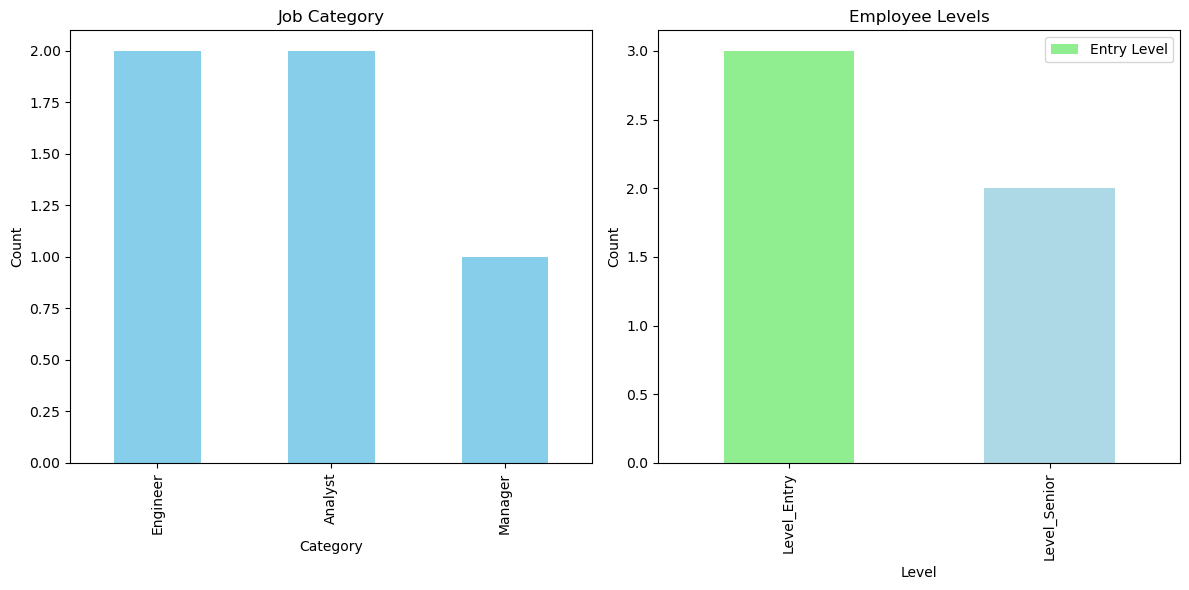

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_encoded is your encoded DataFrame from the previous example
data = {
    'Job Category': ['Engineer', 'Manager', 'Analyst', 'Engineer', 'Analyst'],
    'Business Title': ['Software Engineer', 'Project Manager', 'Business Analyst', 'Network Engineer', 'Data Analyst'],
    'Civil Service Title': ['Engineer I', 'Manager I', 'Analyst I', 'Engineer II', 'Analyst II'],
    'Level': ['Entry', 'Senior', 'Entry', 'Senior', 'Entry'],
    'Career Level': ['Junior', 'Senior', 'Junior', 'Senior', 'Junior'],
    'Job Category Encoded': [0, 2, 1, 0, 1],
    'Level_Entry': [1, 0, 1, 0, 1],
    'Level_Senior': [0, 1, 0, 1, 0],
    'Career Level_Junior': [1, 0, 1, 0, 1],
    'Career Level_Senior': [0, 1, 0, 1, 0]
}

df_encoded = pd.DataFrame(data)

# Plotting bar graphs using matplotlib
plt.figure(figsize=(12, 6))

# Example 1: Bar graph for Job Category
plt.subplot(1, 2, 1)
df_encoded['Job Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Job Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Example 2: Stacked bar graph for Level and Career Level
plt.subplot(1, 2, 2)
df_encoded[['Level_Entry', 'Level_Senior']].sum().plot(kind='bar', stacked=True, color=['lightgreen', 'lightblue'])
plt.title('Employee Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.legend(['Entry Level', 'Senior Level'])

plt.tight_layout()
plt.show()


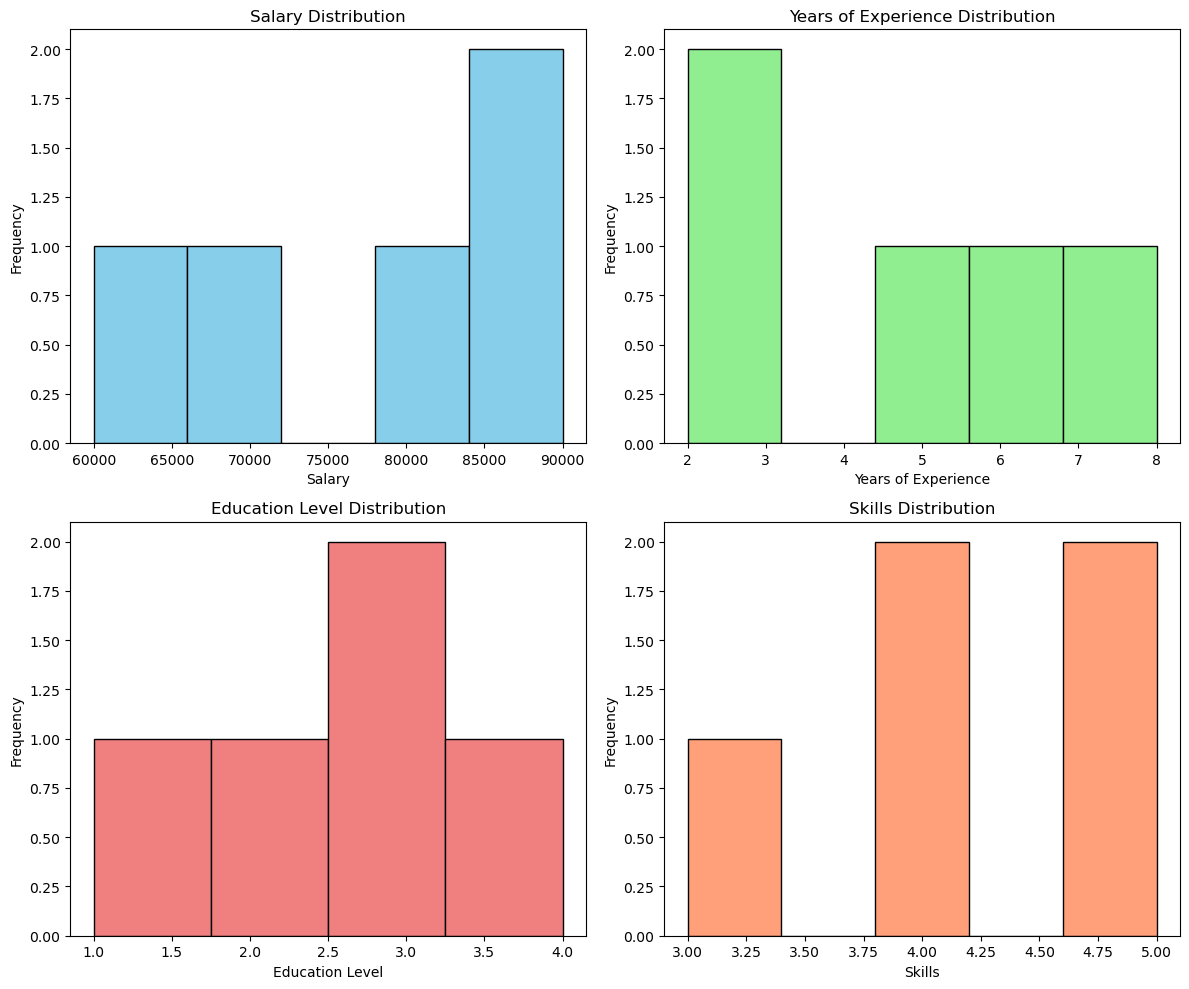

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame with numerical columns
data = {
    'Salary': [60000, 80000, 70000, 90000, 85000],
    'Years of Experience': [2, 5, 3, 8, 6],
    'Education Level': [1, 3, 2, 4, 3],
    'Skills': [5, 4, 3, 5, 4]
}

df_encoded = pd.DataFrame(data)

# Plotting histograms using matplotlib
plt.figure(figsize=(12, 10))

# Example 1: Histogram for Salary
plt.subplot(2, 2, 1)
plt.hist(df_encoded['Salary'], bins=5, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Example 2: Histogram for Years of Experience
plt.subplot(2, 2, 2)
plt.hist(df_encoded['Years of Experience'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

# Example 3: Histogram for Education Level
plt.subplot(2, 2, 3)
plt.hist(df_encoded['Education Level'], bins=4, color='lightcoral', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

# Example 4: Histogram for Skills
plt.subplot(2, 2, 4)
plt.hist(df_encoded['Skills'], bins=5, color='lightsalmon', edgecolor='black')
plt.title('Skills Distribution')
plt.xlabel('Skills')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


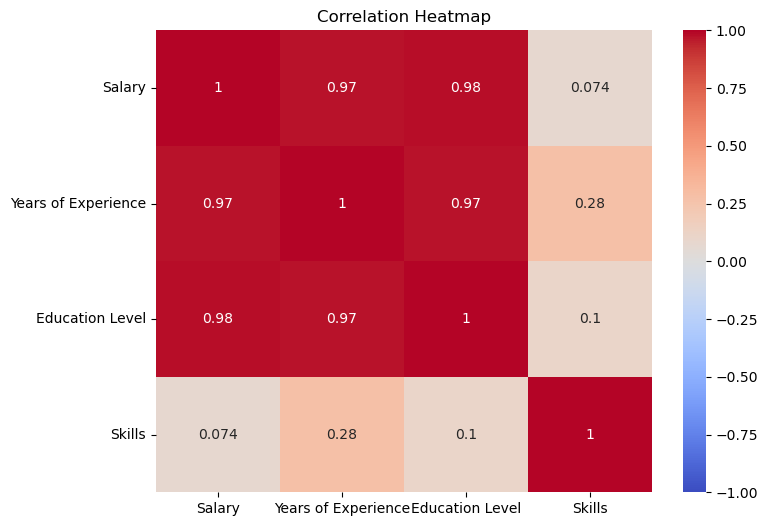

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your DataFrame)
data = {
    'Salary': [60000, 80000, 70000, 90000, 85000],
    'Years of Experience': [2, 5, 3, 8, 6],
    'Education Level': [1, 3, 2, 4, 3],
    'Skills': [5, 4, 3, 5, 4]
}

df_encoded = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


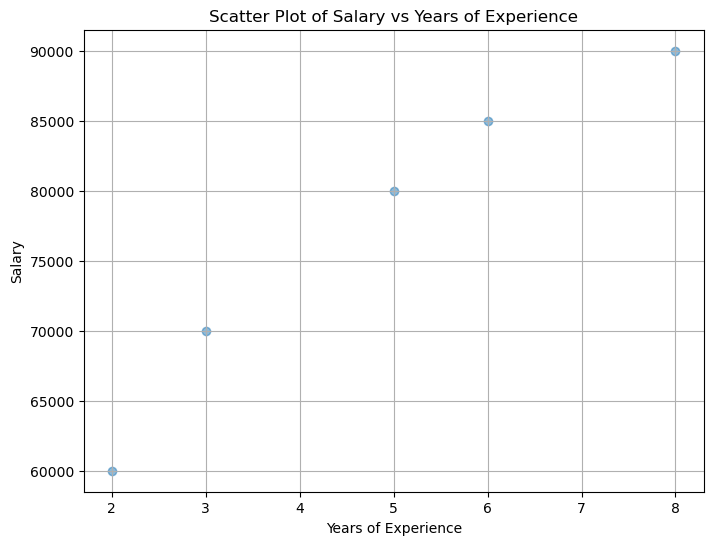

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your DataFrame)
data = {
    'Salary': [60000, 80000, 70000, 90000, 85000],
    'Years of Experience': [2, 5, 3, 8, 6],
    'Education Level': [1, 3, 2, 4, 3],
    'Skills': [5, 4, 3, 5, 4]
}

df_encoded = pd.DataFrame(data)

# Extract variables for the scatter plot
x_variable = 'Years of Experience'
y_variable = 'Salary'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_encoded[x_variable], df_encoded[y_variable], alpha=0.5)
plt.title(f'Scatter Plot of {y_variable} vs {x_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.grid(True)
plt.show()


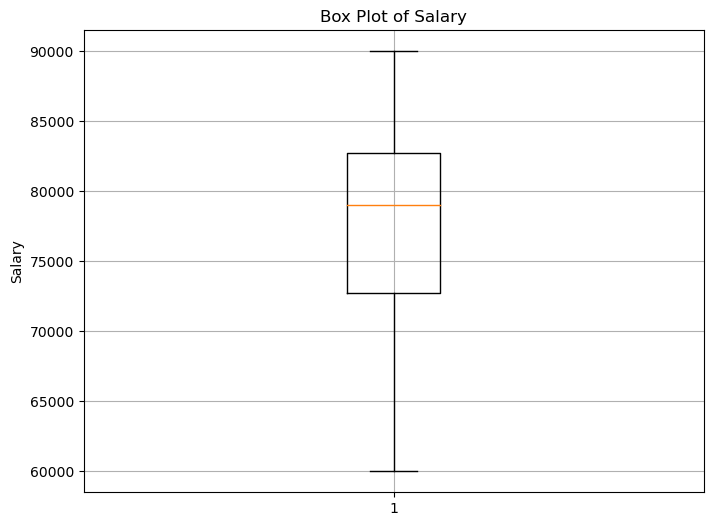

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your DataFrame)
data = {
    'Salary': [60000, 80000, 70000, 90000, 85000, 75000, 72000, 78000, 82000, 83000],
    'Years of Experience': [2, 5, 3, 8, 6, 4, 3, 7, 5, 6],
    'Education Level': [1, 3, 2, 4, 3, 2, 1, 3, 2, 4],
    'Skills': [5, 4, 3, 5, 4, 3, 2, 4, 5, 3]
}

df_encoded = pd.DataFrame(data)

# Extract variable for the box plot
variable = 'Salary'

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_encoded[variable])
plt.title(f'Box Plot of {variable}')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


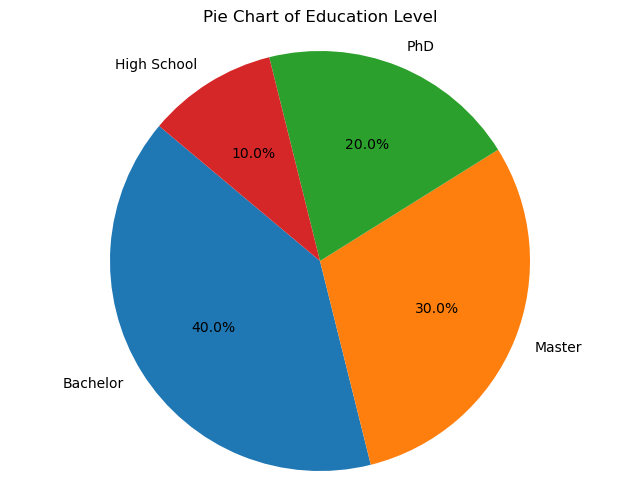

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your DataFrame)
data = {
    'Salary': [60000, 80000, 70000, 90000, 85000, 75000, 72000, 78000, 82000, 83000],
    'Education Level': ['Bachelor', 'Master', 'Bachelor', 'PhD', 'Master', 'Bachelor', 'High School', 'Master', 'Bachelor', 'PhD']
}

df_encoded = pd.DataFrame(data)

# Count the frequency of each category
education_counts = df_encoded['Education Level'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Education Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset (replace 'data.csv' with your actual file path)
df = pd.read_csv('jobs_NYC_postings.csv')

# Select relevant features and target variable
features = ['Job Category', 'Business Title', 'Civil Service Title', 'Level', 'Career Level']
target = 'Salary Range To'

X = df[features]
y = df[target]

# Handle missing values (if any)
X.fillna('Unknown', inplace=True)

# Perform one-hot encoding for categorical features
# Here, we'll encode all categorical features
categorical_features = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)],
                       remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Optionally, save the trained model for future use
# import joblib
# joblib.dump(model, 'salary_range_prediction_model.pkl')




C:\Users\HP\AppData\Local\Temp\ipykernel_7492\218199638.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna('Unknown', inplace=True)


Mean Absolute Error: 6571.109200366798
Mean Squared Error: 156691104.4048096


In [49]:
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'column1': ['A', None, 'C', 'D'],
    'column2': [1, 2, None, 4]
})

# Explicitly copy subset
X = df[['column1', 'column2']].copy()

# Fill missing values
X.fillna('Unknown', inplace=True)

# Now X is modified as intended without warning
print(X)


   column1  column2
0        A      1.0
1  Unknown      2.0
2        C  Unknown
3        D      4.0


In [50]:
X = df[['column1', 'column2']].copy()
X.fillna('Unknown', inplace=True)


In [51]:
X.loc[X['column1'].isnull(), 'column1'] = 'Unknown'


In [52]:
X.loc[:, 'column1'] = X['column1'].fillna('Unknown')


In [31]:
jobs_posting.head()

Empty DataFrame
Columns: [Job ID, Agency, Posting Type, # Of Positions, Business Title, Civil Service Title, Title Classification, Title Code No, Level, Job Category, Full-Time/Part-Time indicator, Career Level, Salary Range From, Salary Range To, Salary Frequency, Work Location, Division/Work Unit, Job Description, Minimum Qual Requirements, Preferred Skills, Additional Information, To Apply, Hours/Shift, Work Location 1, Recruitment Contact, Residency Requirement, Posting Date, Post Until, Posting Updated, Process Date]
Index: []

[0 rows x 30 columns]

In [62]:
##NEW SALARY PRIDICTION MODEL 

In [65]:
import pandas as pd

# Load the dataset
file_path = 'Jobs_NYC_postings.csv'  # Replace with your actual file path
jobs_posting = pd.read_csv(file_path)

# Display first few rows and check column names
print(jobs_posting.head())


   Job ID                         Agency Posting Type  # Of Positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3  580593   DEPARTMENT OF TRANSPORTATION     External               1   
4  624937  DEPT OF HEALTH/MENTAL HYGIENE     External               1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    02   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B

In [66]:
print(jobs_posting.columns.values)



['Job ID' 'Agency' 'Posting Type' '# Of Positions' 'Business Title'
 'Civil Service Title' 'Title Classification' 'Title Code No' 'Level'
 'Job Category' 'Full-Time/Part-Time indicator' 'Career Level'
 'Salary Range From' 'Salary Range To' 'Salary Frequency' 'Work Location'
 'Division/Work Unit' 'Job Description' 'Minimum Qual Requirements'
 'Preferred Skills' 'Additional Information' 'To Apply' 'Hours/Shift'
 'Work Location 1' 'Recruitment Contact' 'Residency Requirement'
 'Posting Date' 'Post Until' 'Posting Updated' 'Process Date']


In [67]:
print(jobs_posting.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [68]:
# Check for missing values
print(jobs_posting.isnull().sum())

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
To Apply                          426
Hours/Shift                      3210
Work Location 1                  3229
Recruitment Contact              5120
Residency Requirement               0
Posting Date

In [ ]:
##Exploratory Data Analysis (EDA)

              Job ID  # Of Positions  Salary Range From  Salary Range To  \
count    5120.000000     5120.000000        5120.000000      5120.000000   
mean   598721.366211        2.070898       64625.224123     89978.575734   
std     28274.636161        5.799227       31378.516179     46732.299939   
min    469953.000000        1.000000           0.000000        15.000000   
25%    586358.000000        1.000000       51869.000000     64608.000000   
50%    607060.000000        1.000000       62397.000000     85147.000000   
75%    621404.000000        1.000000       80557.000000    113550.000000   
max    628806.000000      150.000000      225000.000000    252165.000000   

       Recruitment Contact  
count                  0.0  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN  


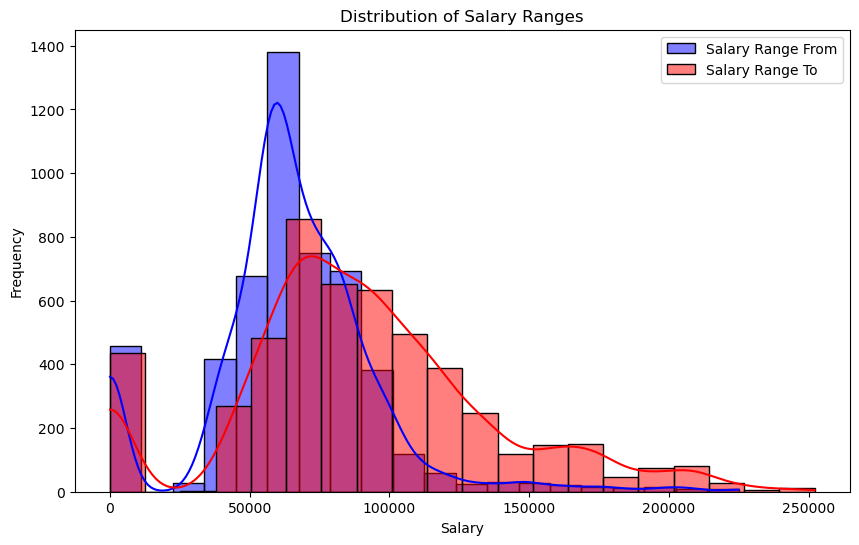

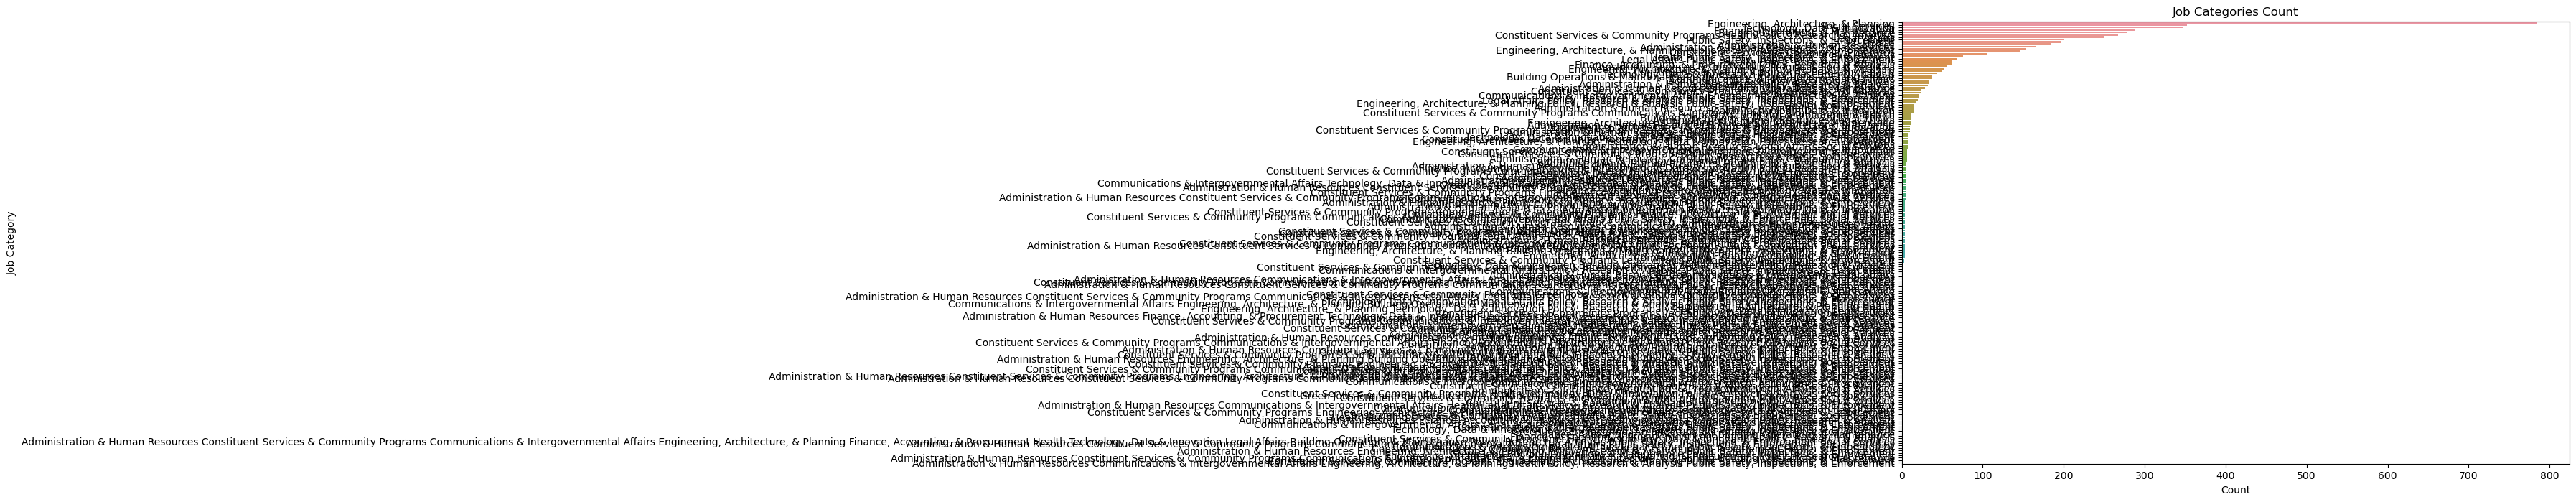

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
print(jobs_posting.describe())

# Distribution of numerical variables (e.g., Salary Range From, Salary Range To)
plt.figure(figsize=(10, 6))
sns.histplot(jobs_posting['Salary Range From'], bins=20, kde=True, color='blue', label='Salary Range From')
sns.histplot(jobs_posting['Salary Range To'], bins=20, kde=True, color='red', label='Salary Range To')
plt.title('Distribution of Salary Ranges')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize categorical variables (e.g., Job Category, Agency)
plt.figure(figsize=(12, 8))
sns.countplot(y='Job Category', data=jobs_posting, order=jobs_posting['Job Category'].value_counts().index)
plt.title('Job Categories Count')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.show()


In [ ]:
## Feature Engineering

In [71]:
# Example: Extract years of experience from job descriptions or minimum qualifications
jobs_posting['Years of Experience'] = jobs_posting['Job Description'].str.extract(r'(\d+) years of experience')

# Create dummy variables for categorical features if needed
# Example: pd.get_dummies(jobs_posting['Job Category'], prefix='JobCategory', drop_first=True)


In [ ]:
## Model Selection and Training

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target variable
features = ['Years of Experience', 'Job Category', 'Agency', 'Level']  # Adjust according to your analysis
X = jobs_posting[features]
y = jobs_posting['Salary Range From']  # Predicting Salary Range From

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

# Optionally, try other regression models like Random Forest, Gradient Boosting, etc.


Mean Absolute Error: 406221495736.69147
Mean Squared Error: 8.448812761546529e+25
Root Mean Squared Error: 9191742360154.863


In [ ]:
##Random Forest Regression

In [73]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print('Random Forest - Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Random Forest - Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest - Root Mean Squared Error:', mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest - Mean Absolute Error: 12455.449050724543
Random Forest - Mean Squared Error: 395729488.30648375
Random Forest - Root Mean Squared Error: 19892.950718947748


In [ ]:
##Gradient Boosting Regression

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print('Gradient Boosting - Mean Absolute Error:', mean_absolute_error(y_test, y_pred_gb))
print('Gradient Boosting - Mean Squared Error:', mean_squared_error(y_test, y_pred_gb))
print('Gradient Boosting - Root Mean Squared Error:', mean_squared_error(y_test, y_pred_gb, squared=False))


Gradient Boosting - Mean Absolute Error: 16123.266435042691
Gradient Boosting - Mean Squared Error: 524118370.06571984
Gradient Boosting - Root Mean Squared Error: 22893.631648686056


In [ ]:
##Step-by-Step Deployment and Monitoring

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train, X_test, y_train, y_test are already defined from earlier steps

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
##Trained Model

In [76]:
import joblib

# Save the trained model to a file
model_filename = 'salary_prediction_rf_model.pkl'
joblib.dump(rf_model, model_filename)


['salary_prediction_rf_model.pkl']

In [ ]:
##Deployment for Prediction

In [77]:
# Load the saved model
loaded_model = joblib.load(model_filename)

# Example prediction (replace with actual data)
new_data = X_test.iloc[0]  # Example: taking the first row from the test set
predicted_salary_range_from = loaded_model.predict([new_data])[0]

print(f'Predicted Salary Range From: ${predicted_salary_range_from:.2f}')


Predicted Salary Range From: $31637.03


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Load the dataset (assuming 'jobs_posting' is already loaded)
# Example feature selection
features = ['Years of Experience', 'Job Category', 'Agency', 'Level']  # Adjust according to your analysis
X = jobs_posting[features]
y = jobs_posting['Salary Range From']  # Predicting Salary Range From

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'salary_prediction_rf_model.pkl'
joblib.dump(rf_model, model_filename)

# Deployment example (loading and using the model)
loaded_model = joblib.load(model_filename)

# Example prediction (replace with actual data)
new_data = X_test.iloc[0]  # Example: taking the first row from the test set
predicted_salary_range_from = loaded_model.predict([new_data])[0]

print(f'Predicted Salary Range From: ${predicted_salary_range_from:.2f}')

# Evaluation on test set
y_pred = loaded_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))


Predicted Salary Range From: $31637.03
Mean Absolute Error: 12455.449050724543
Mean Squared Error: 395729488.30648375
Root Mean Squared Error: 19892.950718947748


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
